#  🏷️`Dragon Real Estate - Price Predictor`🏠

 

In [1]:
import pandas as pd 
housing = pd.read_csv("C:\\Users\\SHWETA BHOYAR\\OneDrive\\python practice set\\Python 1 st ml project\\end-to-end-ml\\data.csv")

In [2]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
print(housing.shape)

(506, 14)


In [5]:
housing.describe() #Before we started fillinmg missing attributes or Imputer 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
housing.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         501
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [7]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

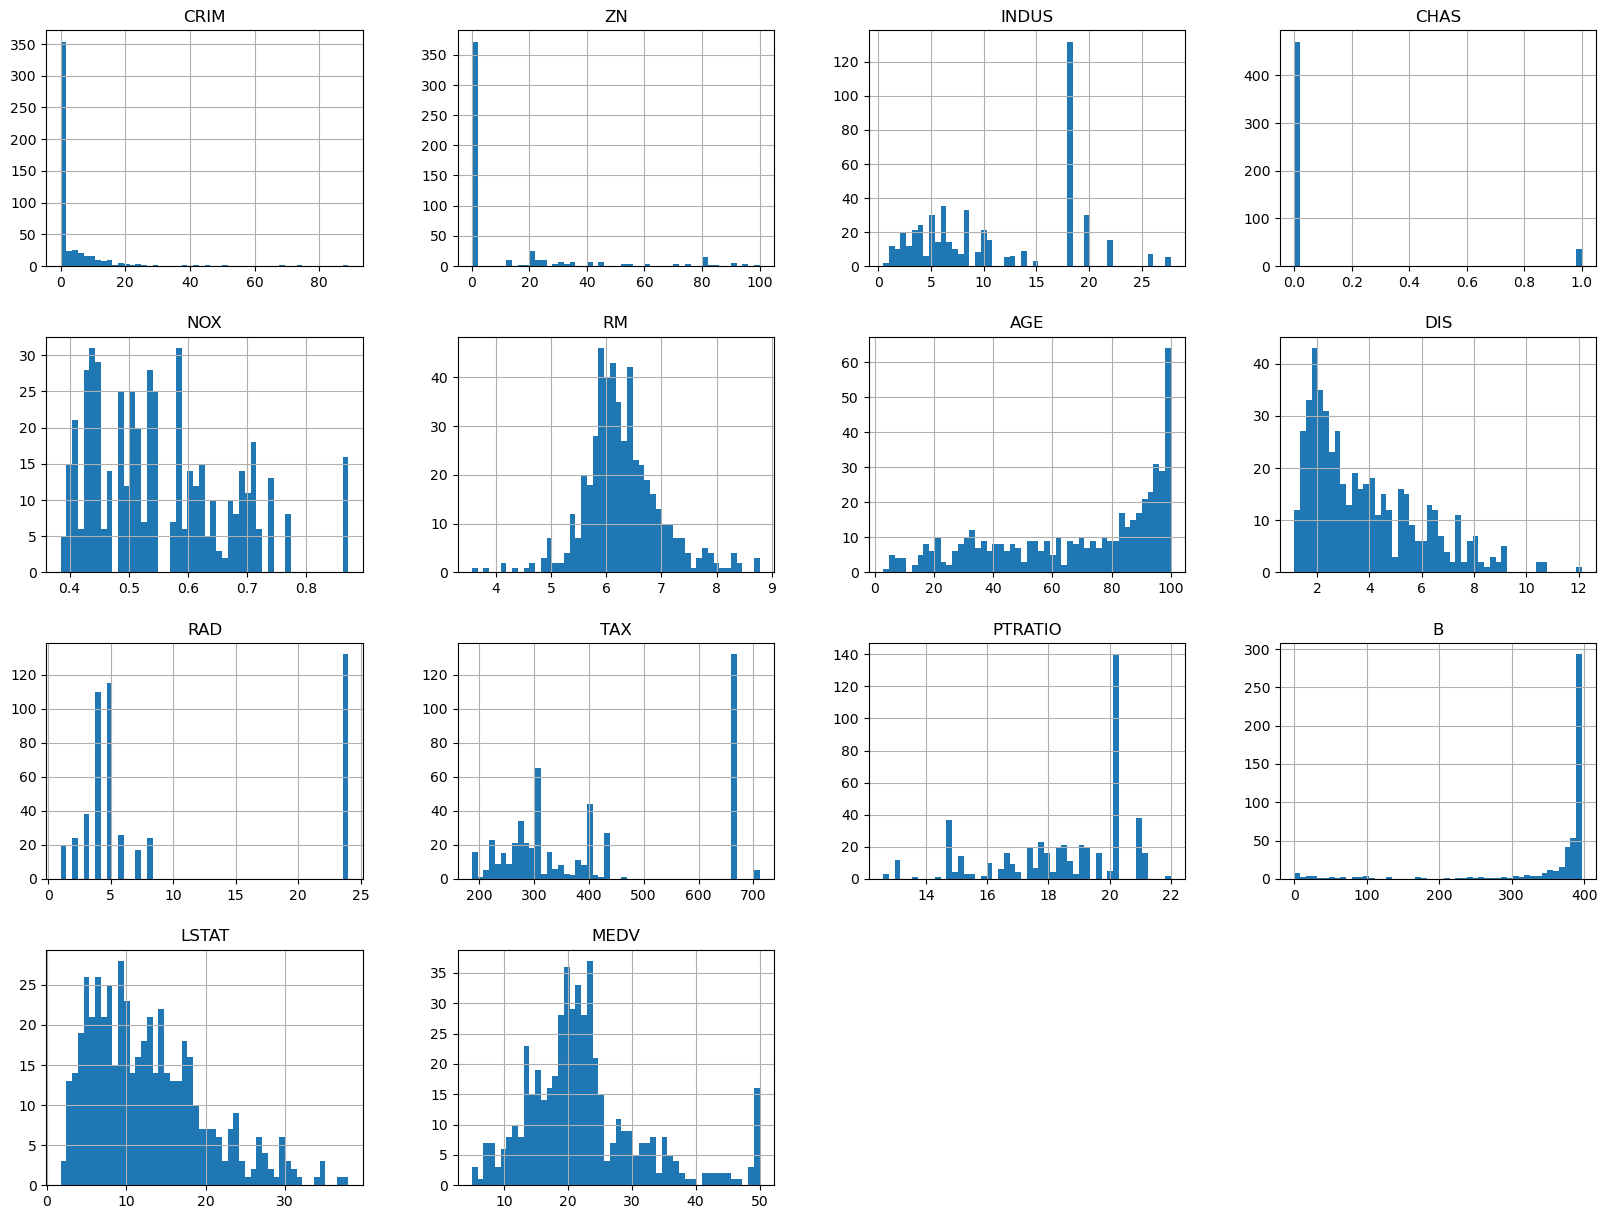

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## train test splitting

In [9]:
#for learning purpus
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42) #set the Random number 
    shuffled = np.random.permutation(len(data)) #change the Random number 
    print(shuffled)
    test_set_size = int(len(data)* test_ratio)
    train_indices = shuffled[:test_set_size]
    test_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
        

In [10]:
train_set, test_set =split_train_test(housing,0.2) #now shuffled value is fixed 

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [11]:
#print(f'Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n')

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)
print(f'Rows in train set:{len(train_set)}\nRows in test set: {len(test_set)}\n')

Rows in train set:404
Rows in test set: 102



In [13]:
#if CHAS is a very impactful in the data  so we are think to predict this data in equal if you are doing right prediction 

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=2,random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
   
    

In [15]:
 strat_test_set['CHAS'].value_counts()

CHAS
0    2
Name: count, dtype: int64

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    469
1     35
Name: count, dtype: int64

In [17]:
housing= strat_train_set.copy()

In [18]:
#95/7

In [19]:
#376/28

## Looking for correlations 

In [20]:
corr_matrix = housing.corr()


In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696446
ZN         0.360019
B          0.334471
DIS        0.249450
CHAS       0.174946
AGE       -0.376480
RAD       -0.382374
CRIM      -0.388755
NOX       -0.427621
TAX       -0.469009
INDUS     -0.484156
PTRATIO   -0.507473
LSTAT     -0.738056
Name: MEDV, dtype: float64

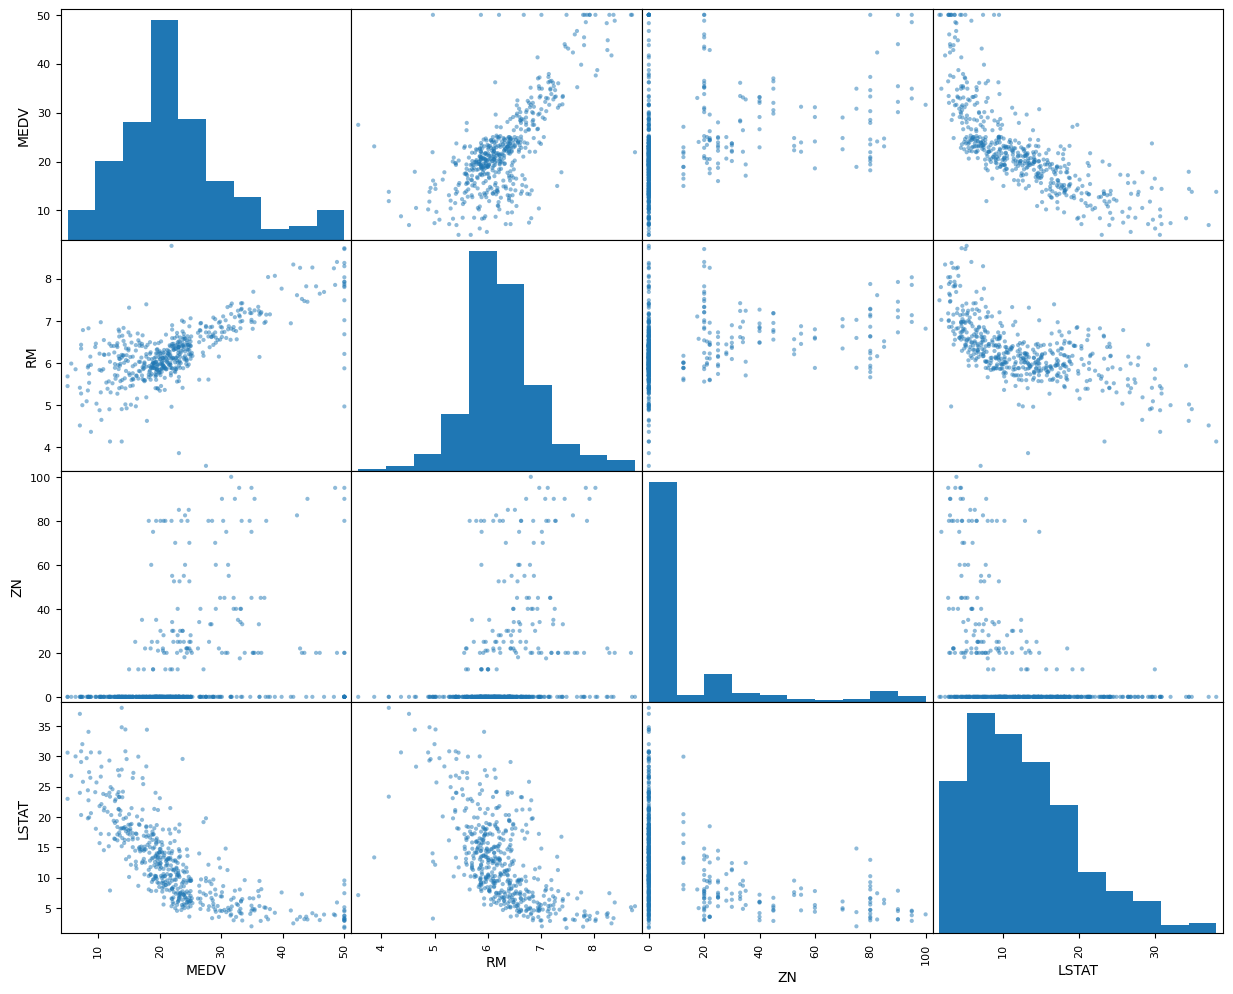

In [22]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes],figsize=(15,12))
plt.show()

<Axes: xlabel='RM', ylabel='MEDV'>

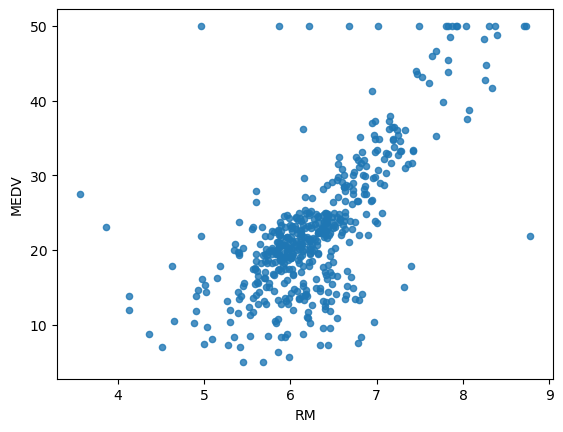

In [23]:
housing.plot(kind="scatter", x = 'RM',y= 'MEDV',alpha=0.8)

In [24]:
#50 per capping means rm value low and high price is same this is question
#average number of rooms and house price same is not possible 
#  2 attributes new  crate and predict newly 

## Attribute combinations 

In [25]:
housing['TAXRM']= housing['TAX']/housing['RM']

In [26]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02,13.6,55.116697
99,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,37.216828
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37,20.4,73.569482
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1,103.997502
475,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666,20.2,302.76,24.10,13.3,108.081792


In [27]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696446
ZN         0.360019
B          0.334471
DIS        0.249450
CHAS       0.174946
AGE       -0.376480
RAD       -0.382374
CRIM      -0.388755
NOX       -0.427621
TAX       -0.469009
INDUS     -0.484156
PTRATIO   -0.507473
TAXRM     -0.540910
LSTAT     -0.738056
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

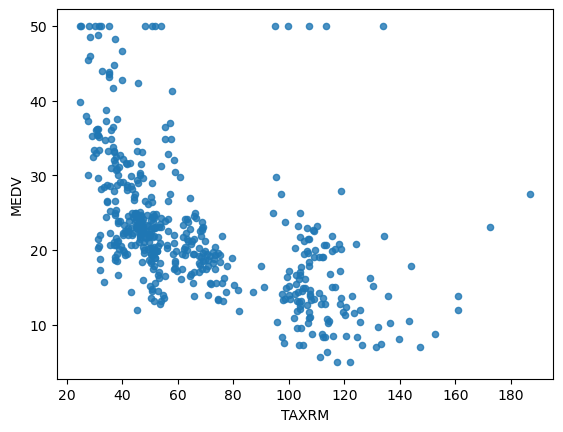

In [28]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV', alpha=0.8)

In [29]:
housing= strat_train_set.drop('MEDV',axis=1)
housing_labels = strat_train_set['MEDV'].copy()

## Missing Attributes

- To take care of missing attributes you have three options :
    - get rid of the missing   data points
    - Get rid of the whole attributes 
    - Set the vales to some values(0,mean or median)

In [30]:
a=housing.dropna(subset=["RM"])#option1
a.shape

(499, 13)

In [31]:
housing.drop('RM', axis=1)#option2
#Note that there is no RM Column and also note that original housing dataframe will remain unchange 

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
20,1.25179,0.0,8.14,0,0.538,98.1,3.7979,4,307,21.0,376.57,21.02
99,0.06860,0.0,2.89,0,0.445,62.5,3.4952,2,276,18.0,396.90,6.19
118,0.13058,0.0,10.01,0,0.547,73.1,2.4775,6,432,17.8,338.63,15.37
402,9.59571,0.0,18.10,0,0.693,100.0,1.6390,24,666,20.2,376.11,20.31
475,6.39312,0.0,18.10,0,0.584,97.4,2.2060,24,666,20.2,302.76,24.10
...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1,0.770,83.4,2.7227,24,666,20.2,395.43,11.48
455,4.75237,0.0,18.10,0,0.713,86.5,2.4358,24,666,20.2,50.92,18.13
466,3.77498,0.0,18.10,0,0.655,84.7,2.8715,24,666,20.2,22.01,17.15
234,0.44791,0.0,6.20,1,0.507,66.5,3.6519,8,307,17.4,360.20,8.05


In [32]:
median=housing['RM'].median()# compute median for option 3
housing['RM'].fillna(median)#option3
#Note that the original housing dataframe will remain unchanged

20     5.570
99     7.416
118    5.872
402    6.404
475    6.162
       ...  
358    6.127
455    6.525
466    5.952
234    6.726
369    6.683
Name: RM, Length: 504, dtype: float64

In [33]:
housing.shape

(504, 13)

In [34]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_ # calculate median for each columns

array([2.5651e-01, 0.0000e+00, 9.6900e+00, 0.0000e+00, 5.3800e-01,
       6.2080e+00, 7.7150e+01, 3.2157e+00, 5.0000e+00, 3.3000e+02,
       1.9000e+01, 3.9144e+02, 1.1360e+01])

In [36]:
imputer.statistics_.shape

(13,)

In [37]:
X=imputer.transform(housing)

In [38]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [39]:
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.25179,0.0,8.14,0.0,0.538,5.570,98.1,3.7979,4.0,307.0,21.0,376.57,21.02
1,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19
2,0.13058,0.0,10.01,0.0,0.547,5.872,73.1,2.4775,6.0,432.0,17.8,338.63,15.37
3,9.59571,0.0,18.10,0.0,0.693,6.404,100.0,1.6390,24.0,666.0,20.2,376.11,20.31
4,6.39312,0.0,18.10,0.0,0.584,6.162,97.4,2.2060,24.0,666.0,20.2,302.76,24.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24.0,666.0,20.2,395.43,11.48
500,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13
501,3.77498,0.0,18.10,0.0,0.655,5.952,84.7,2.8715,24.0,666.0,20.2,22.01,17.15
502,0.44791,0.0,6.20,1.0,0.507,6.726,66.5,3.6519,8.0,307.0,17.4,360.20,8.05


In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,3.618780,11.408730,11.128075,0.069444,0.554714,6.283577,68.510913,3.798697,9.529762,407.773810,18.447222,357.161429,12.649861
std,8.617243,23.357742,6.865996,0.254461,0.116092,0.703480,28.186327,2.109066,8.698341,168.476191,2.165093,90.564697,7.152837
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.175000,0.000000,0.449000,5.884750,44.850000,2.097050,4.000000,279.000000,17.375000,375.472500,6.927500
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.150000,3.215700,5.000000,330.000000,19.000000,391.440000,11.360000
75%,3.674808,12.500000,18.100000,0.000000,0.624000,6.620500,94.100000,5.212575,24.000000,666.000000,20.200000,396.215000,16.992500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Scikit-learn Design

Primarily, three types of objects 

1. Estimaters- It estimates some parameter based on a Dataset Eg. Imputer
    - it has a fir method and transform method
    - fits method-  fits the dataset and calculated internal parameters
    

2. Transformers- Transform methods takes inputs and return output based on the learning from fit(). it also has a convinience function called fit_transform ()which transform fit and  them transforms


3. Predictors - Linear Regression model is an example of predictor  .fit() and predict() are two common functions, it also gives score () function which will evaluate the predictions.

## Features scaling 

- Primarily,  tow types of features scaling methods :
1. Min-max scaling (Normalization)
- (value - min)/(max - min)
- sklearn provides a class called minmaxscaler  for this

2. Standerdization
-  (value - mean)/std
- sklearn provides a class called standerdscaler for this

## Creating Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        # ....add as many as pipeline 
                       ('std_scaler', StandardScaler())])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)
housing_num_tr.shape

(504, 13)

## SELECT A DESIRED MODEL FOR DRAGON REAL STATE 

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= DecisionTreeRegressor()
#model = LinearRegression()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [44]:
some_data = housing.iloc[:5]
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
20,1.25179,0.0,8.14,0,0.538,5.570,98.1,3.7979,4,307,21.0,376.57,21.02
99,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432,17.8,338.63,15.37
402,9.59571,0.0,18.10,0,0.693,6.404,100.0,1.6390,24,666,20.2,376.11,20.31
475,6.39312,0.0,18.10,0,0.584,6.162,97.4,2.2060,24,666,20.2,302.76,24.10


In [45]:
some_labels = housing_labels.iloc[:5]
some_labels

20     13.6
99     33.2
118    20.4
402    12.1
475    13.3
Name: MEDV, dtype: float64

In [46]:
prepared_data = my_pipeline.transform(some_data)


In [47]:
model.predict(prepared_data)

array([13.842, 32.724, 19.906, 11.577, 13.922])

In [48]:
list(some_labels)

[13.6, 33.2, 20.4, 12.1, 13.3]

### Evaluating the model

In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse= np.sqrt(mse)

In [50]:
rmse

1.1939276777104941

## Using better evaluation technique -cross validation

In [51]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels , scoring='neg_mean_squared_error',cv=10)
rmse_scores= np.sqrt(-scores)

In [52]:
rmse_scores

array([2.85682651, 3.31045538, 2.62922127, 4.1003657 , 2.25169187,
       2.58588372, 4.19980724, 2.97284365, 3.74747059, 2.68365332])

In [53]:
import numpy as np
def print_scores(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('standerd_deviation:',scores.std())

In [54]:
print_scores(rmse_scores)

scores: [2.85682651 3.31045538 2.62922127 4.1003657  2.25169187 2.58588372
 4.19980724 2.97284365 3.74747059 2.68365332]
mean: 3.133821925676542
standerd_deviation: 0.6416073085801611


## Decision tree model outputs 
- mean: 4.016694425298018
- standerd_deviation: 0.7032992359930768
    
## LinearRegression model output
-  mean: 4.7818341428688536
- standerd_deviation: 0.8806046872688686
## RandomForestRegressor model output
- mean: 3.133821925676542
- standerd_deviation: 0.6416073085801611

### sklearn joblib (Saving the model)

In [58]:
from joblib import dump,load
dump(model,'Dragon.joblib')

['Dragon.joblib']

In [59]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
# print(final_predictions, list(Y_test))

In [60]:
final_rmse

1.405176501369135

In [61]:
prepared_data[0]

array([-2.74953619e-01, -4.88919920e-01, -4.35631480e-01, -2.73179182e-01,
       -1.44112359e-01, -1.01536095e+00,  1.05081041e+00, -3.78467528e-04,
       -6.36357646e-01, -5.98742954e-01,  1.18023309e+00,  2.14519071e-01,
        1.17134710e+00])

## Using the model

In [62]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib') 
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262747,
       -11.44443979304, -49.31238772,  7.61111401, -26.0016879 , -0.5778192 ,
       -0.97491834,  0.41164221, -66.86091034]])
model.predict(features)

array([23.509])